# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Trisya Nurmayanti
- **Email:** trisyanurmayanti07@gmail.com
- **ID Dicoding:** trisya

## Menentukan Pertanyaan Bisnis

- Faktor apa yang paling mempengaruhi jumlah peminjaman sepeda?
- Kapan waktu peminjaman sepeda paling tinggi dan paling rendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# membaca google drive untuk menagkses dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# membaca dan menampilkan 5 data pertama day_df
day_df = pd.read_csv('/content/drive/MyDrive/ILT ML/belajar analisis data dengan python/submission/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# membaca dan menampilkan 5 data pertama dataframe hour_df
hour_df = pd.read_csv('/content/drive/MyDrive/ILT ML/belajar analisis data dengan python/submission/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- terdapat 17 variabel pada dataframe hour_df dan 16 variabel pada dataframe day_df. kedua dataframe nama variabelnya sama hanya berbeda di kolom hr pada di dataframe hour_df
- variabel Waktu: instant, dteday, season, yr, mnth, hr, weekday, holiday, workingday
- variabel Cuaca: weathersit, temp, atemp, hum, windspeed
- variabel Jumlah peminjaman: casual, registered, cnt
- kolom yr itu tahun yang terdiri dari tahun 2011 ditandai 0, 2012 ditandai dengan 1
- instant itu seperti id
- dteday itu tanggal yang berformay tahun-bulan-tanggal
- season itu terdiri dari (1:springer, 2:summer, 3:fall, 4:winter)
- mnth : nama bulan dalam satuan angka
- hr : jam dari 0 (12 malam) sampai 23 (11 malam)
- holiday : hari libur atau tidak. anggap 0 itu bukan hari libur dan satu itu hari libur
weekday : hari dalam seminggu
- workingday : hari kerja atau bukan. hari kerja ditandai 1, bukan hari kerja 0
- weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Suhu dalam Celsius (ternormalisasi, dibagi 41)
- atemp : Suhu yang terasa dalam Celsius (ternormalisasi, dibagi 50)
- hum : Kelembapan udara (ternormalisasi, dibagi 100)
- windspeed : Kecepatan angin (ternormalisasi, dibagi 67)
-	casual : Jumlah pengguna non-terdaftar
-	registered : Jumlah pengguna terdaftar
-	cnt : Total jumlah penyewaan sepeda (casual + registered)



### Assessing Data

In [5]:
# melihat data detail day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# cek duplikasi dataframe day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
# melihat describe day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
# melihat detail data hour_df
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
# cek duplikasi hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
# describe dataframe hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- dteday, yr, mnth harusnya dalam format datetime, perlu dikonversi
- season, weekday, diubah menjadi kategoris
- tidak ada keanehan pada describe semua dataset
- mengganti nama kolom/variabel 'date_day', 'season', 'year', 'month', 'holiday', 'weekday', 'workingday', agar mudah dibaca

### Cleaning Data

In [11]:
# UBAH NAMA KOLOM/VARIABEL dteday, yr, mnth, hum, cnt PADA DATAFRAME day_df
day_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "hum" : "humidity",
    "cnt": "total_rentals"
}, inplace=True)

In [12]:
# MENAMPILKAN KOLOM/VARIABEL BERHASIL DIUBAH ATAU TIDAK
day_df.columns.tolist()

['instant',
 'date_day',
 'season',
 'year',
 'month',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_rentals']

In [13]:
# mengubah tipe data kolom date_day pada dataframe day_df menjadi datetime
day_df["date_day"] = pd.to_datetime(day_df["date_day"])

# mengubah tipe data kolom season pada dataframe day_df menajdi kategorik
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
day_df["season"] = day_df["season"].map(season_mapping).astype("category")

# mengubah tipe data kolom weekday pada dataframe day_df menajdi kategorik
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
                   4: "Thursday", 5: "Friday", 6: "Saturday"}
day_df["weekday"] = day_df["weekday"].map(weekday_mapping).astype("category")

# Ubah 'year' (0 → 2011, 1 → 2012)
day_df["year"] = day_df["year"].map({0: 2011, 1: 2012})

# Ubah 'month' (1 → January, 2 → February, dst.)
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
day_df["month"] = day_df["month"].map(month_mapping)

# Ubah 'holiday' (0 → No Holiday, 1 → Holiday)
day_df["holiday"] = day_df["holiday"].map({0: "No Holiday", 1: "Holiday"})

# Ubah 'workingday' (0 → Non-Working Day, 1 → Working Day)
day_df["workingday"] = day_df["workingday"].map({0: "Non-Working Day", 1: "Working Day"})

In [14]:
# cek data detail dataframe day_df berhasil diubah atau tidak
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   date_day       731 non-null    datetime64[ns]
 2   season         731 non-null    category      
 3   year           731 non-null    int64         
 4   month          731 non-null    object        
 5   holiday        731 non-null    object        
 6   weekday        731 non-null    category      
 7   workingday     731 non-null    object        
 8   weathersit     731 non-null    int64         
 9   temp           731 non-null    float64       
 10  atemp          731 non-null    float64       
 11  humidity       731 non-null    float64       
 12  windspeed      731 non-null    float64       
 13  casual         731 non-null    int64         
 14  registered     731 non-null    int64         
 15  total_rentals  731 non-

In [15]:
# UBAH NAMA KOLOM/VARIABEL dteday, yr, mnth, hr, hum, cnt PADA DATAFRAME hour_df
hour_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "hr" : "hour",
    "hum" : "humidity",
    "cnt": "total_rentals"
}, inplace=True)

In [16]:
# MENAMPILKAN KOLOM/VARIABEL BERHASIL DIUBAH ATAU TIDAK
hour_df.columns.tolist()

['instant',
 'date_day',
 'season',
 'year',
 'month',
 'hour',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'total_rentals']

In [17]:
# mengubah tipe data kolom date_day pada dataframe hour_df menjadi datetime
hour_df["date_day"] = pd.to_datetime(hour_df["date_day"])

# mengubah tipe data kolom season pada dataframe hour_df menajdi kategorik
season_mapping = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
hour_df["season"] = hour_df["season"].map(season_mapping).astype("category")

# mengubah tipe data kolom weekday pada dataframe hour_df menajdi kategorik
weekday_mapping = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday",
                   4: "Thursday", 5: "Friday", 6: "Saturday"}
hour_df["weekday"] = hour_df["weekday"].map(weekday_mapping).astype("category")

# Ubah 'year' (0 → 2011, 1 → 2012)
hour_df["year"] = hour_df["year"].map({0: 2011, 1: 2012})

# Ubah 'month' (1 → January, 2 → February, dst.)
month_mapping = {
    1: "January", 2: "February", 3: "March", 4: "April",
    5: "May", 6: "June", 7: "July", 8: "August",
    9: "September", 10: "October", 11: "November", 12: "December"
}
hour_df["month"] = hour_df["month"].map(month_mapping)

# Ubah 'holiday' (0 → No Holiday, 1 → Holiday)
hour_df["holiday"] = hour_df["holiday"].map({0: "No Holiday", 1: "Holiday"})

# Ubah 'workingday' (0 → Non-Working Day, 1 → Working Day)
hour_df["workingday"] = hour_df["workingday"].map({0: "Non-Working Day", 1: "Working Day"})

In [18]:
# cek data detail dataframe hour_df berhasil diubah atau tidak
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   date_day       17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   year           17379 non-null  int64         
 4   month          17379 non-null  object        
 5   hour           17379 non-null  int64         
 6   holiday        17379 non-null  object        
 7   weekday        17379 non-null  category      
 8   workingday     17379 non-null  object        
 9   weathersit     17379 non-null  int64         
 10  temp           17379 non-null  float64       
 11  atemp          17379 non-null  float64       
 12  humidity       17379 non-null  float64       
 13  windspeed      17379 non-null  float64       
 14  casual         17379 non-null  int64         
 15  registered     1737

**Insight:**
- data telah berhasil dilakukan cleaning dengan mengganti nama kolom menjadi lebih mudah dibaca
- mengganti tipe data kolom agar mudah dipahami

## Exploratory Data Analysis (EDA)

### Explore ...

In [19]:
### Menampilkan Statistik Deskriptif dataframe day_df
day_df.describe(include="all")

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,731.000000,731,731,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,January,No Holiday,Monday,Working Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [20]:
# Menampilkan Statistik Deskriptif dataframe hour_df
hour_df.describe(include="all")

,instant,date_day,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_rentals
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,2,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,May,NaN,No Holiday,Saturday,Working Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,16879,2512,11865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,NaN,NaN,NaN,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,NaN,NaN,NaN,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,NaN,NaN,NaN,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,NaN,NaN,NaN,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,NaN,NaN,NaN,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [46]:
#  Penggabungan Data Harian dan Data Jam untuk Analisis Peminjaman
"""
menggabungkan data harian yang ada dalam `day_df` dengan data aggregrasi berdasarkan jam dari `hour_df`.
Data jam ini akan dihitung berdasarkan total peminjaman, peminjaman casual, peminjaman terdaftar, suhu rata-rata harian, kelembapan, dan kecepatan angin.
Dengan menggunakan fungsi `agg()`, kita akan mengelompokkan data berdasarkan hari (`date_day`)
dan menghitung total peminjaman, total peminjaman casual, total peminjaman terdaftar, serta menghitung rata-rata suhu, kelembapan, dan kecepatan angin per hari.
Setelah itu, kita akan menggabungkan data harian dan data yang sudah dianalisis berdasarkan jam untuk mendapatkan dataset yang lebih lengkap.
"""
agg_hour = hour_df.groupby("date_day").agg({
    "total_rentals": "sum",
    "casual": "sum",
    "registered": "sum",
    "temp": "mean",
    "humidity": "mean",
    "windspeed": "mean"
}).reset_index()

all_df = day_df.merge(agg_hour, on="date_day", suffixes=("_day", "_agg"))

In [52]:
# Daftar kolom numerik untuk analisis korelasi
num_cols = ['temp_agg', 'humidity_agg', 'windspeed_agg', 'casual_ratio', 'registered_ratio', 'total_rentals_agg']

# Analisis korelasi dengan jumlah peminjaman
correlation_matrix = all_df[num_cols].corr()['total_rentals_agg'].sort_values(ascending=False)
print("Korelasi dengan total peminjaman:")
correlation_matrix

Korelasi dengan total peminjaman:


,total_rentals_agg
total_rentals_agg,1.000000
temp_agg,0.627494
casual_ratio,0.275479
humidity_agg,-0.100659
windspeed_agg,-0.234545
registered_ratio,-0.275479


In [57]:
# Rata-rata peminjaman berdasarkan kategori
season_avg = all_df.groupby('season')['total_rentals_agg'].mean().sort_values(ascending=False)

print("\nRata-rata peminjaman berdasarkan musim:")
season_avg


Rata-rata peminjaman berdasarkan musim:


<ipython-input-57-22b7d1923ec7>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = all_df.groupby('season')['total_rentals_agg'].mean().sort_values(ascending=False)


,total_rentals_agg
season,
fall,5644.303191
summer,4992.331522
winter,4728.162921
spring,2604.132597


In [58]:
# analsisis total_rentals berdasarkan weathersit
weather_avg = all_df.groupby('weathersit')['total_rentals_agg'].mean().sort_values(ascending=False)
print("\nRata-rata peminjaman berdasarkan kondisi cuaca:")
weather_avg


Rata-rata peminjaman berdasarkan kondisi cuaca:


,total_rentals_agg
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [59]:
# Analisis Peminjaman Berdasarkan Hari Kerja vs Hari Libur
"""
kita akan melihat rata-rata peminjaman sepeda yang terjadi pada hari kerja (`workingday`) dibandingkan dengan hari non-kerja (libur).
Dengan mengelompokkan data berdasarkan `workingday`, kita dapat mengetahui perbedaan peminjaman sepeda antara hari kerja dan hari libur.
"""
workingday_avg = all_df.groupby('workingday')['total_rentals_agg'].mean()
print("\nRata-rata peminjaman berdasarkan hari kerja:")
workingday_avg


Rata-rata peminjaman berdasarkan hari kerja:


,total_rentals_agg
workingday,
Non-Working Day,4330.168831
Working Day,4584.820000


In [61]:
# Analisis Peminjaman Berdasarkan Hari Libur
"""
menganalisis rata-rata peminjaman sepeda berdasarkan apakah hari tersebut berdasarkan hari libur atau bukan.
Kolom `holiday` menunjukkan apakah hari tersebut libur atau bukan Libur
dan kolom `total_rentals_agg` menunjukkan total peminjaman sepeda pada hari tersebut.
Dengan pengelompokan berdasarkan `holiday`, kita dapat mengetahui apakah ada perbedaan signifikan dalam peminjaman sepeda antara hari libur dan hari biasa.
"""
holiday_avg = all_df.groupby('holiday')['total_rentals_agg'].mean()
print("\nRata-rata peminjaman berdasarkan hari libur:")
holiday_avg


Rata-rata peminjaman berdasarkan hari libur:


,total_rentals_agg
holiday,
Holiday,3735.000000
No Holiday,4527.104225


In [63]:
# Analisis Peminjaman Tertinggi dan Terendah Berdasarkan Bulan
"""
menganalisis rata-rata peminjaman sepeda berdasarkan bulan.
Data yang digunakan adalah kolom `month` yang menunjukkan bulan peminjaman dan kolom `total_rentals_agg` yang menunjukkan total peminjaman sepeda pada bulan tersebut.
Dengan menggunakan metode pengelompokan berdasarkan bulan, kita dapat mengidentifikasi bulan dengan peminjaman tertinggi dan terendah.
"""
month_avg = all_df.groupby('month')['total_rentals_agg'].mean().sort_values(ascending=False)
print("\nRata-rata peminjaman berdasarkan bulan:")
month_avg


Rata-rata peminjaman berdasarkan bulan:


,total_rentals_agg
month,
June,5772.366667
September,5766.516667
August,5664.419355
July,5563.677419
May,5349.774194
October,5199.225806
April,4484.900000
November,4247.183333
March,3692.258065


In [70]:
# menampilkan peminjaman sepeda tertinggi berdasarkan bulan mengggunakan idxmax, dan terendah berdasarkan hari idxmin
print(f"Bulan dengan peminjaman tertinggi: {month_avg.idxmax()}")
print(f"Bulan dengan peminjaman terendah: {month_avg.idxmin()}")

Bulan dengan peminjaman tertinggi: June
Bulan dengan peminjaman terendah: January


In [68]:
# menganalisis rata-rata total rental berdasarkan hari dalam seminggu
"""
menganalisis rata-rata jumlah peminjaman sepeda berdasarkan hari dalam seminggu (weekdays).
Kita akan menghitung rata-rata peminjaman sepeda per hari untuk mengetahui tren peminjaman sepeda
"""
weekday_avg = all_df.groupby('weekday')['total_rentals_agg'].mean().sort_values(ascending=False)
print("\nRata-rata peminjaman berdasarkan hari dalam seminggu:")
weekday_avg


Rata-rata peminjaman berdasarkan hari dalam seminggu:


<ipython-input-68-cfdb304bb54d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = all_df.groupby('weekday')['total_rentals_agg'].mean().sort_values(ascending=False)


,total_rentals_agg
weekday,
Friday,4690.288462
Thursday,4667.259615
Saturday,4550.542857
Wednesday,4548.538462
Tuesday,4510.663462
Monday,4338.123810
Sunday,4228.828571


In [69]:
# menampilkan peminjaman sepeda berdasarkan hari tertinggi mengggunakan idxmax, dan terendah berdasarkan hari idxmin
print(f"Hari dengan peminjaman tertinggi: {weekday_avg.idxmax()}")
print(f"Hari dengan peminjaman terendah: {weekday_avg.idxmin()}")

Hari dengan peminjaman tertinggi: Friday
Hari dengan peminjaman terendah: Sunday


In [125]:
# Analisis Rata-rata Peminjaman Berdasarkan Jam
"""
menganalisis rata-rata jumlah peminjaman sepeda berdasarkan jam.
Data yang digunakan adalah kolom `hour` yang menunjukkan jam peminjaman dan kolom `total_rentals` yang menunjukkan total peminjaman pada jam tersebut.
Kita akan menghitung rata-rata peminjaman sepeda per jam untuk mengetahui tren peminjaman sepeda berdasarkan waktu sepanjang hari.
"""
hour_df.groupby("hour")["total_rentals"].mean()

,total_rentals
hour,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


In [74]:
# Analisis Rasio Peminjaman Casual vs Registered
"""
menganalisis rasio peminjaman sepeda oleh pengguna casual dan pengguna terdaftar.
Kita akan menghitung rata-rata rasio peminjaman untuk setiap jenis pengguna agar dapat memperoleh gambaran tentang proporsi peminjaman antara kedua kelompok ini.
"""
casual_registered_ratio = all_df[['casual_ratio', 'registered_ratio']].mean()
print("\nRata-rata rasio peminjaman casual vs registered:")
casual_registered_ratio


Rata-rata rasio peminjaman casual vs registered:


,0
casual_ratio,0.175598
registered_ratio,0.824402


**Insight:**
- nilai terendah pada peminjaman sepeda adalah pada jam 4 dengan total rentals sebesar 6.352941.
Sedangkan nilai tertinggi adalah pada jam 17 dengan total rentals sebesar 461.452055.
- Suhu (temp_agg) memiliki korelasi positif tertinggi (0.63) terhadap jumlah peminjaman. Artinya, semakin hangat suhu, semakin banyak sepeda yang dipinjam.
- Kecepatan angin (windspeed_agg) dan kelembaban (humidity_agg) memiliki korelasi negatif dengan jumlah peminjaman, meskipun lemah. Semakin tinggi kecepatan angin atau kelembaban, peminjaman cenderung menurun.
- Rasio pengguna casual memiliki korelasi positif (0.28), sedangkan rasio pengguna registered memiliki korelasi negatif (-0.28). Ini menunjukkan bahwa pengguna casual lebih sensitif terhadap faktor lingkungan dibanding pengguna terdaftar.
- total peminjaman sepeda berdasarkan season, yang tertinggi ada di season: Fall sebanyak 5644 unit/hari, dan yang Paling rendah di sesason Spring sebanyak 2604 unit/hari
- total peminjaman sepeda berdasarkan weathersit, yang tertinggi ada di Kategori 1 sebanyak 4876 unit/hari, dan yang paling rendah ada di kategori 3 1803 unit/hari
- Berdasarkan kolom working day, Working Day memiliki lebih banyak peminjaman (4585 unit/hari) dibanding Non-Working Day (4330 unit/hari), kemungkinan karena banyak orang menggunakan sepeda untuk transportasi kerja.
- Holiday memiliki peminjaman lebih sedikit (3735 unit/hari) dibanding non holiday (4527 unit/hari).
- pada peminjaman berdasarkan month Paling tinggi di bulan Juni (5772 unit/hari, dan paling rendah: Januari (2176 unit/hari)
- Berdasarkan weekday, Paling tinggi di hari Jumat (4690 unit/hari), Paling rendah: Minggu (4229 unit/hari)
- Rasio Peminjaman Casual vs Registered:
Mayoritas pengguna adalah pelanggan tetap atau terdaftar sebanyak 82,44%, dibandingkan yang tidak terdaftar (casual) sebanyak 17,56%, menunjukkan bahwa layanan ini lebih sering digunakan untuk transportasi rutin daripada rekreasi.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Faktor apa yang paling mempengaruhi jumlah peminjaman sepeda?

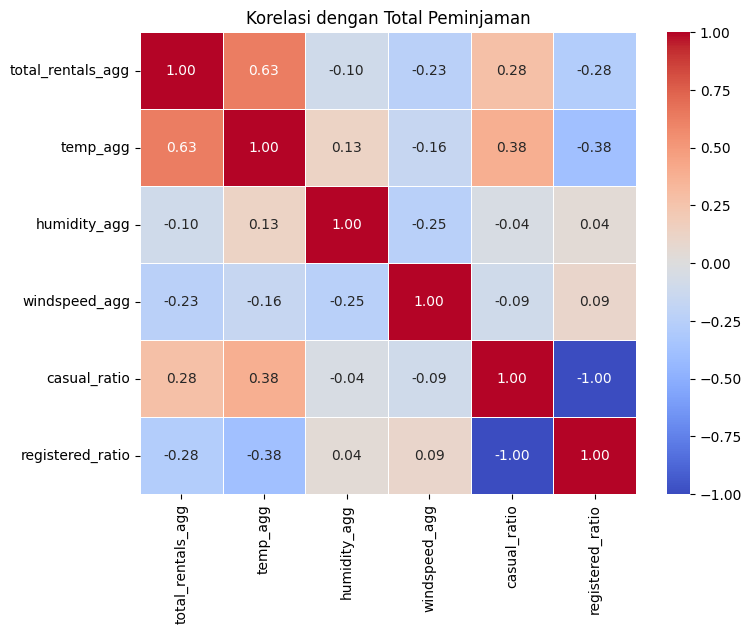

In [76]:
# Korelasi dengan total peminjaman
plt.figure(figsize=(8, 6))
corr = all_df[['total_rentals_agg', 'temp_agg', 'humidity_agg', 'windspeed_agg', 'casual_ratio', 'registered_ratio']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi dengan Total Peminjaman')
plt.show()

<ipython-input-99-5b05ecce5e37>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_avg = all_df.groupby('season')['total_rentals_agg'].mean().sort_values()


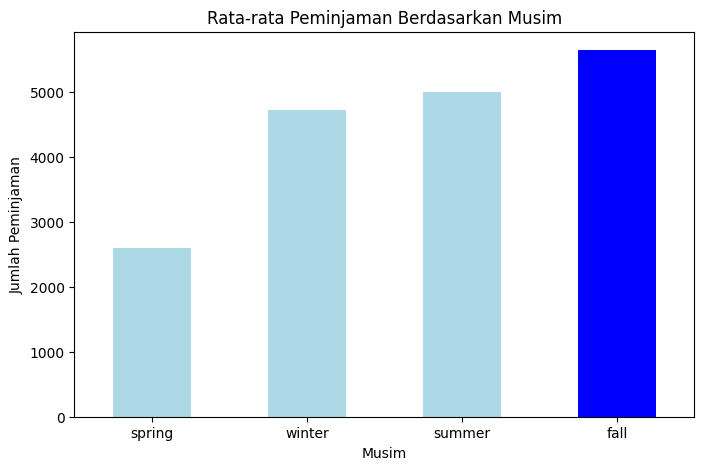

In [99]:
# Rata-rata Peminjaman Berdasarkan Musim
"""
mengeksplorasi bagaimana musim mempengaruhi jumlah peminjaman sepeda.
Grafik batang di bawah ini menunjukkan rata-rata peminjaman sepeda berdasarkan musim yang tercatat,
memberikan wawasan tentang bagaimana preferensi peminjaman berubah seiring musim.
"""
plt.figure(figsize=(8, 5))
season_avg = all_df.groupby('season')['total_rentals_agg'].mean().sort_values()
colors = ['lightblue'] * len(season_avg)
colors[-1] = 'blue'
season_avg.plot(kind='bar', color=colors)
plt.title('Rata-rata Peminjaman Berdasarkan Musim')
plt.ylabel('Jumlah Peminjaman')
plt.xlabel('Musim')
plt.xticks(rotation=0)
plt.show()

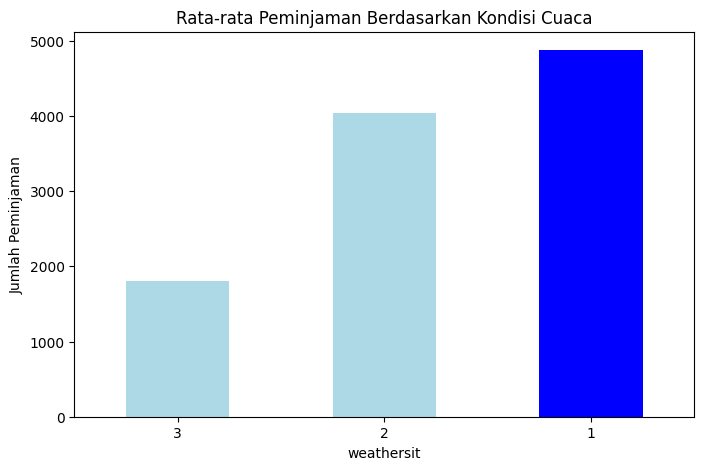

In [127]:
# Rata-rata Peminjaman Berdasarkan Kondisi Cuaca
"""
mengeksplorasi hubungan antara kondisi cuaca dan jumlah peminjaman sepeda.
Grafik batang di bawah ini menunjukkan rata-rata peminjaman sepeda untuk masing-masing kondisi cuaca yang tercatat.
"""
plt.figure(figsize=(8, 5))
weather_avg = all_df.groupby('weathersit')['total_rentals_agg'].mean().sort_values()
colors = ['lightblue'] * len(weather_avg)
colors[-1] = 'blue'
weather_avg.plot(kind='bar', color=colors)
plt.title('Rata-rata Peminjaman Berdasarkan Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.show()

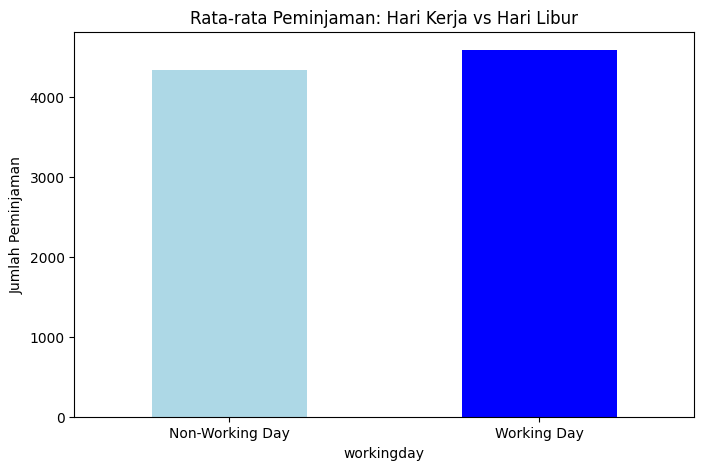

In [101]:
""# Rata-rata Peminjaman: Hari Kerja vs Hari Libur
"""
membandingkan rata-rata peminjaman sepeda antara hari kerja dan hari libur.
Kolom `workingday` digunakan untuk membedakan hari kerja dan hari libur
Grafik batang digunakan untuk memvisualisasikan rata-rata peminjaman sepeda pada kedua kategori ini,
memberikan wawasan tentang perilaku peminjaman sepeda yang berbeda pada kedua jenis hari tersebut.
"""
plt.figure(figsize=(8, 5))
workingday_avg = all_df.groupby('workingday')['total_rentals_agg'].mean()
colors = ['lightblue', 'blue']
workingday_avg.plot(kind='bar', color=colors)
plt.title('Rata-rata Peminjaman: Hari Kerja vs Hari Libur')
plt.ylabel('Jumlah Peminjaman')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'], rotation=0)
plt.show()

### Pertanyaan 2: Faktor apa yang paling mempengaruhi jumlah peminjaman sepeda?

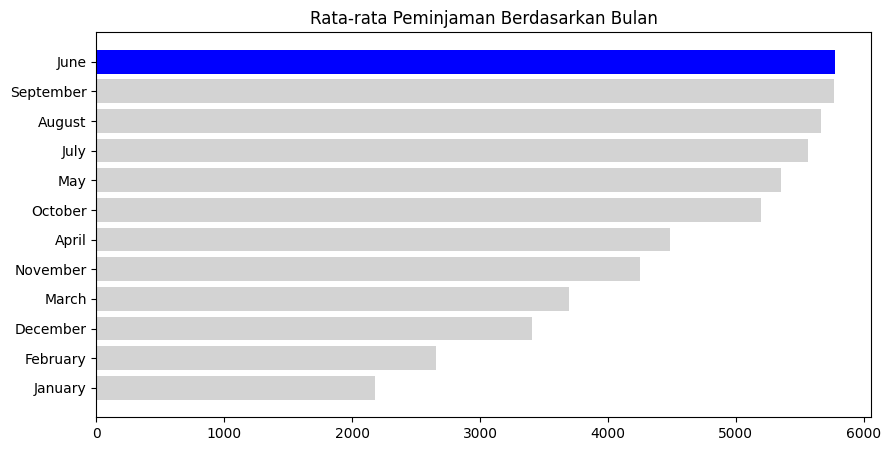

In [106]:
# Rata-rata Peminjaman Berdasarkan Bulan
"""
menghitung rata-rata peminjaman sepeda untuk setiap bulan dalam setahun.
Kolom `month` digunakan untuk mengelompokkan data berdasarkan bulan, dan kemudian dihitung rata-rata peminjaman (`total_rentals_agg`) untuk masing-masing bulan.
Dengan menggunakan grafik batang horizontal, kita dapat dengan mudah melihat bulan mana yang memiliki rata-rata peminjaman tertinggi,
yang memberikan wawasan untuk merencanakan pengelolaan armada sepeda atau strategi pemasaran selama periode tertentu.
"""
plt.figure(figsize=(10, 5))
month_avg = all_df.groupby('month')['total_rentals_agg'].mean().sort_values()
colors = ['lightgray'] * len(month_avg)
colors[-1] = 'blue'
plt.barh(month_avg.index, month_avg, color=colors)
plt.title('Rata-rata Peminjaman Berdasarkan Bulan')
plt.show()

<ipython-input-94-7dfaef24c9c1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_avg = all_df.groupby('weekday')['total_rentals_agg'].mean().sort_values()


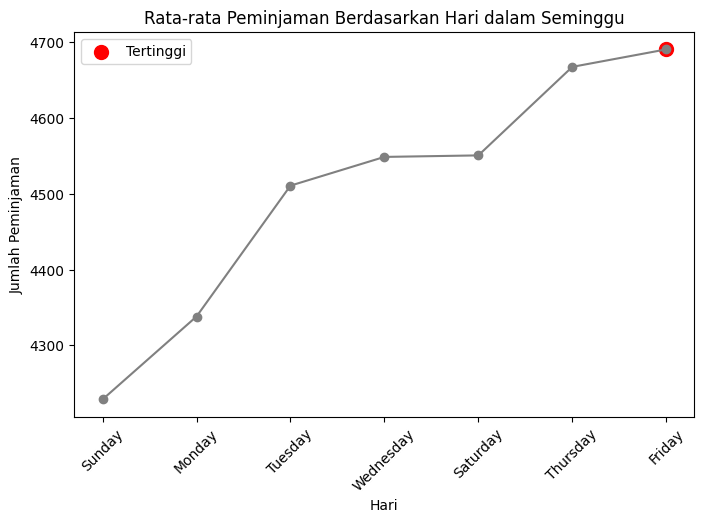

In [94]:
# Rata-rata Peminjaman Berdasarkan Hari dalam Seminggu
"""
menghitung rata-rata peminjaman sepeda berdasarkan hari dalam seminggu.
Kolom `weekday` digunakan untuk mengelompokkan data berdasarkan hari (Senin hingga Minggu), dan kemudian dihitung rata-rata peminjaman (`total_rentals_agg`) untuk setiap hari.
"""
plt.figure(figsize=(8, 5))
weekday_avg = all_df.groupby('weekday')['total_rentals_agg'].mean().sort_values()
colors = ['gray'] * len(weekday_avg)
colors[-1] = 'red'
plt.plot(weekday_avg.index, weekday_avg, marker='o', linestyle='-', color='gray')
plt.scatter(weekday_avg.index[-1], weekday_avg.iloc[-1], color='red', s=100, label='Tertinggi')
plt.title('Rata-rata Peminjaman Berdasarkan Hari dalam Seminggu')
plt.ylabel('Jumlah Peminjaman')
plt.xlabel('Hari')
plt.xticks(rotation=45)
plt.legend()
plt.show()

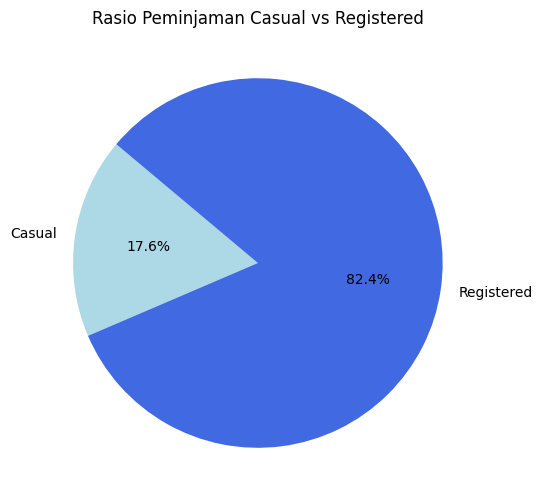

In [96]:
# Pie Chart - Rasio Peminjaman Casual vs Registered
"""
membuat pie chart untuk menggambarkan rasio peminjaman sepeda antara pengguna casual dan pengguna registered.
Rasio ini dihitung dengan mengambil rata-rata dari kolom `casual_ratio` dan `registered_ratio` yang mewakili perbandingan peminjaman sepeda antara kedua kelompok tersebut.
"""
plt.figure(figsize=(6, 6))
labels = ['Casual', 'Registered']
sizes = [all_df['casual_ratio'].mean(), all_df['registered_ratio'].mean()]
colors = ['lightblue', 'royalblue']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Rasio Peminjaman Casual vs Registered')
plt.show()

**Insight:**
- Suhu (temp_agg) berpengaruh positif pada peminjaman, sedangkan angin berdampak negatif.
- fall season memiliki peminjaman tertinggi yang ditandai dengan warna biru dan paling tinggi, sedangkan spring season terendah.
- Kondisi Cuaca: Peminjaman tertinggi kategori 1 ditandai dengan warna biru, menurun di kategori 3.
- Peminjaman lebih tinggi di hari kerja ditandai dengan warna biru, menunjukkan banyak pengguna adalah pekerja.
- peminjaman sepeda pada bulan Juni tertinggi, Januari terendah, kemungkinan karena faktor cuaca.
- Hari dalam Seminggu, hari Jumat tertinggi, Minggu terendah, terkait pola aktivitas pengguna.
- 82% pengguna terdaftar, menunjukkan layanan lebih banyak digunakan oleh pelanggan tetap.

## Analisis Lanjutan (Opsional)

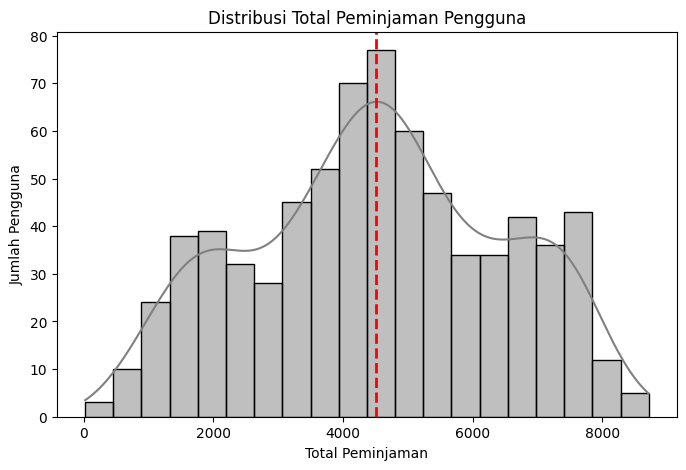

In [114]:
# Histogram distribusi pengguna berdasarkan total peminjaman
"""
Pada bagian ini, menganalisis distribusi total peminjaman oleh pengguna.
Untuk itu, menggunakan histogram untuk menggambarkan distribusi data,
serta menambahkan garis vertikal yang menunjukkan nilai rata-rata dari total peminjaman pengguna.
Ini akan membantu melihat pola umum dalam data, apakah ada nilai peminjaman yang ekstrem atau tidak merata.
"""
plt.figure(figsize=(8, 5))
sns.histplot(all_df['total_rentals_agg'], bins=20, color='gray', kde=True)
plt.axvline(all_df['total_rentals_agg'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.title('Distribusi Total Peminjaman Pengguna')
plt.xlabel('Total Peminjaman')
plt.ylabel('Jumlah Pengguna')
plt.show()

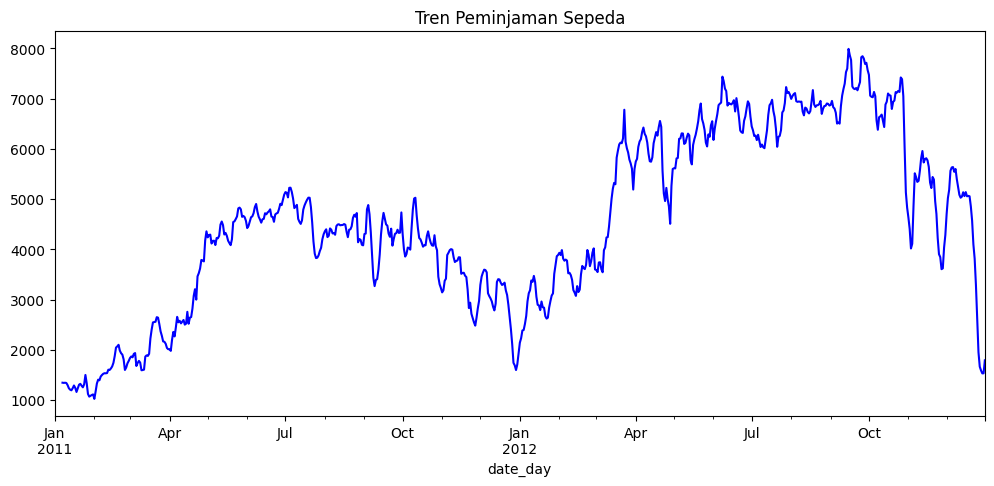

In [123]:
### Analisis Time Series - Tren Peminjaman Sepeda
"""
menganalisis tren peminjaman sepeda dari waktu ke waktu.
Untuk melakukan analisis time series, kita akan mengelompokkan data berdasarkan tanggal dan menghitung total peminjaman sepeda pada setiap hari.
Selanjutnya, kita akan menggunakan metode rolling mean (rata-rata bergerak) dengan window 7 hari untuk melihat tren jangka panjang
dan mengurangi fluktuasi data harian yang mungkin tidak relevan.
"""
plt.figure(figsize=(12, 5))
all_df.groupby('date_day')['total_rentals_agg'].sum().rolling(window=7).mean().plot(color='blue')
plt.title('Tren Peminjaman Sepeda')
plt.show()

## Conclusion

- Dari hasil analisis yang dilakukan, kita dapat melihat bahwa faktor-faktor seperti suhu (temperature), kecepatan angin (windspeed), dan kelembaban (humidity) memiliki pengaruh terhadap jumlah peminjaman sepeda. Suhu (temperature) memiliki korelasi positif yang kuat terhadap jumlah peminjaman. Artinya, semakin tinggi suhu, semakin banyak sepeda yang dipinjam.
Kecepatan angin (windspeed) dan kelembaban (humidity) menunjukkan korelasi negatif yang lemah dengan jumlah peminjaman. Ini berarti, semakin tinggi kecepatan angin atau kelembaban udara, jumlah peminjaman sepeda cenderung menurun.
- Berdasarkan data, peminjaman sepeda menunjukkan pola musiman dan harian sebagai berikut.
Bulan dengan peminjaman tertinggi adalah Oktober, sedangkan bulan dengan peminjaman terendah adalah Desember.
Hari dalam seminggu dengan peminjaman tertinggi adalah Jumat, sementara hari dengan peminjaman terendah adalah Minggu.
Jam dengan peminjaman tertinggi adalah 17:00 (jam 5 sore), dan jam dengan peminjaman terendah adalah 04:00 (jam 4 pagi).